疑问:  
关于train与test数据集如何在数据集中应用  

In [28]:
# 各种函数库
#coding:utf-8
#导入warnings包，利用过滤器来实现忽略警告语句。
import warnings
warnings.filterwarnings('ignore')
# 查看当前运行环境
import sys
print(sys.executable)
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

/home/xyz/anaconda3/envs/ds/bin/python


In [29]:
# 自定义函数
# reduce_mem_usage 函数通过调整数据类型，帮助我们减少数据在内存中占用的空间
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() 
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() 
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

# 0.数据准备  
进行简单的特征处理 

In [30]:
# 读取数据
# path = "./datalab/231784/"
path = "../dataSet/"
Train_data = pd.read_csv(path+'used_car_train_20200313.csv', sep=' ')
Test_data = pd.read_csv(path+'used_car_testA_20200313.csv', sep=' ')

In [31]:
sample_feature = Train_data

In [32]:
Train_data.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'seller', 'offerType', 'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3',
       'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14'],
      dtype='object')

In [33]:
# 一种删除数据列的方式
continuous_feature_names = [x for x in sample_feature.columns if x not in ['SaleID','price','brand','model']]

In [34]:
continuous_feature_names

['name',
 'regDate',
 'bodyType',
 'fuelType',
 'gearbox',
 'power',
 'kilometer',
 'notRepairedDamage',
 'regionCode',
 'seller',
 'offerType',
 'creatDate',
 'v_0',
 'v_1',
 'v_2',
 'v_3',
 'v_4',
 'v_5',
 'v_6',
 'v_7',
 'v_8',
 'v_9',
 'v_10',
 'v_11',
 'v_12',
 'v_13',
 'v_14']

In [35]:
sample_feature = sample_feature.dropna().replace('-', 0).reset_index(drop=True)
sample_feature['notRepairedDamage'] = sample_feature['notRepairedDamage'].astype(np.float32)

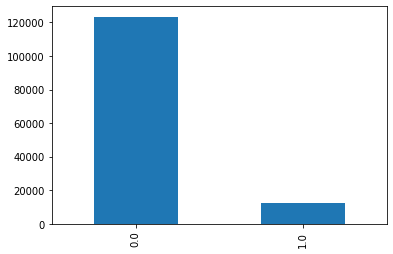

In [36]:
sample_feature['notRepairedDamage'].value_counts().plot.bar()

In [37]:
train = sample_feature[continuous_feature_names + ['price']]
train_X = train[continuous_feature_names]
train_y = train['price']

# 1.模型创建

In [38]:
# 简单建模
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
model = model.fit(train_X, train_y)

## 截距（intercept）与权重(coef)

In [39]:
# 查看训练的线性回归模型的截距（intercept）与权重(coef)
## 为什么要查看? 没找到确切答案
print('intercept:'+ str(model.intercept_) )
sorted(dict(zip(continuous_feature_names, model.coef_)).items(), key=lambda x:x[1], reverse=True)

intercept:-20363582297.77103


[('v_1', 11272628413.494913),
 ('v_10', 9385540723.330614),
 ('v_2', 4210911501.0453506),
 ('v_0', 464390436.5837885),
 ('v_5', 13893492.619089063),
 ('v_6', 4786253.077426003),
 ('v_8', 4475194.700017679),
 ('v_9', 3964022.4985133107),
 ('v_4', 3000776.3184398054),
 ('v_7', 2457589.693937668),
 ('offerType', 224715.99617004395),
 ('v_14', 83525.31254033673),
 ('gearbox', 1579.8305023558771),
 ('bodyType', 216.53867312633213),
 ('power', 2.00356822572024),
 ('creatDate', 0.227260194614543),
 ('regionCode', 0.06414451839152426),
 ('name', 0.0003024328625996635),
 ('regDate', -0.008990215649200287),
 ('seller', -68.20033119254502),
 ('fuelType', -145.2932124073332),
 ('notRepairedDamage', -150.83229003239632),
 ('kilometer', -312.40063495949937),
 ('v_13', -7022745.046297411),
 ('v_3', -237682039.4000195),
 ('v_12', -1491521014.7013748),
 ('v_11', -7400278383.566034)]

In [40]:
# 随机选取n个样本
from matplotlib import pyplot as plt
subsample_index = np.random.randint(low=0, high=len(train_y), size=50)
subsample_index

array([ 46146, 110591,  65876,   1621,  33981,  22496, 109487,  65019,
        72326, 114062,  38130,  62800, 121528,  58081,  16082,    709,
       106314, 135675,  39620, 101247,   1785,  10223,  53225,   6650,
        99509,  79910, 118110,  86896, 128422,  36453,  53697,   8727,
       104805, 100518,  86087,  20264,  16612,  26485,  21825, 108530,
         8051,  97359,  77694,  98969,  50566, 101829,  59695,  13384,
        62330,  35910])

The predicted price is obvious different from true price


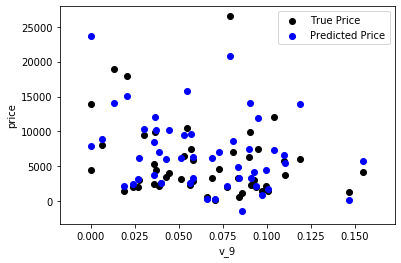

In [41]:
plt.scatter(train_X['v_9'][subsample_index], train_y[subsample_index], color='black')
plt.scatter(train_X['v_9'][subsample_index], model.predict(train_X.loc[subsample_index]), color='blue')
plt.xlabel('v_9')
plt.ylabel('price')
plt.legend(['True Price','Predicted Price'],loc='upper right')
print('The predicted price is obvious different from true price')
plt.show()

## 预测值处理

It is clear to see the price shows a typical exponential distribution


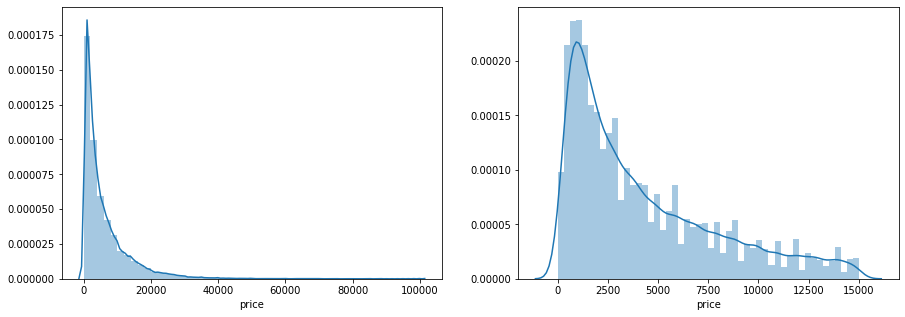

In [42]:
# 通过作图发现数据的标签（price）呈现长尾分布，不利于我们的建模预测
## 原因是很多模型都假设数据误差项符合正态分布，而长尾分布的数据违背了这一假设
import seaborn as sns

print('It is clear to see the price shows a typical exponential distribution')
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(train_y)
plt.subplot(1,2,2)
sns.distplot(train_y[train_y < np.quantile(train_y, 0.9)])

The transformed price seems like normal distribution


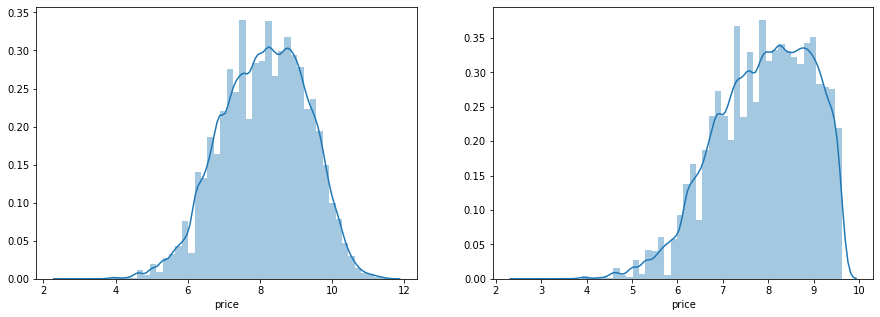

In [43]:
# 对标签进行了log(x+1)变换，使标签贴近于正态分布
train_y_ln = np.log(train_y + 1)
print('The transformed price seems like normal distribution')
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(train_y_ln)
plt.subplot(1,2,2)
sns.distplot(train_y_ln[train_y_ln < np.quantile(train_y_ln, 0.9)])

In [44]:
# 再次训练
# 对比发现截距和权重有所减小
# 权重减小,有利于模型的鲁棒性, 截距目前还不知道
model = model.fit(train_X, train_y_ln)
print('intercept:'+ str(model.intercept_))
sorted(dict(zip(continuous_feature_names, model.coef_)).items(), key=lambda x:x[1], reverse=True)

intercept:409669.1584432834


[('v_11', 136514.5284493697),
 ('v_12', 25747.315630082787),
 ('v_3', 3721.3485078684826),
 ('v_5', 277.231897894601),
 ('v_9', 77.57558214203306),
 ('v_13', 59.991746222047446),
 ('v_7', 47.70418278988135),
 ('v_8', 35.85480411602446),
 ('gearbox', 0.0454757322888385),
 ('bodyType', 0.00037123240436552683),
 ('power', 8.02082036269555e-05),
 ('creatDate', 1.821207476780752e-05),
 ('name', -4.937643079400241e-08),
 ('regDate', -3.4256446007947975e-07),
 ('regionCode', -2.387388128110426e-06),
 ('fuelType', -0.0021279389412818435),
 ('kilometer', -0.008641005183171423),
 ('v_14', -0.02793446233358086),
 ('seller', -0.10164548352935893),
 ('notRepairedDamage', -0.24127058656919562),
 ('offerType', -4.220274019986391),
 ('v_4', -19.46421106042666),
 ('v_6', -165.78381335834223),
 ('v_0', -9352.035331887313),
 ('v_2', -75773.75752208405),
 ('v_10', -177088.3929643273),
 ('v_1', -211696.2456171604)]

The predicted price seems normal after np.log transforming


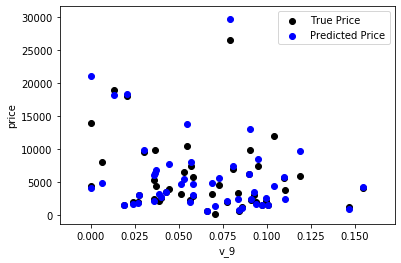

In [45]:
# 再次对比
plt.scatter(train_X['v_9'][subsample_index], train_y[subsample_index], color='black')
plt.scatter(train_X['v_9'][subsample_index], np.exp(model.predict(train_X.loc[subsample_index])), color='blue')
plt.xlabel('v_9')
plt.ylabel('price')
plt.legend(['True Price','Predicted Price'],loc='upper right')
print('The predicted price seems normal after np.log transforming')
plt.show()

# 2.交叉验证  

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,  make_scorer

def log_transfer(func):
    def wrapper(y, yhat):
        result = func(np.log(y), np.nan_to_num(np.log(yhat)))
        return result
    return wrapper

## 标签未log化与log化处理后对比

In [47]:
# log_transfer的作用是将y与预测值y都进行log化, 这样做为的是和下面lg处理后的score保持一致。都是在lg的维度下计算。
scores_n = cross_val_score(model, X=train_X, y=train_y, verbose=1, cv = 5, scoring=make_scorer(log_transfer(mean_absolute_error)))
print('未处理标签AVG:', np.mean(scores_n))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
未处理标签AVG: 1.492955642810073
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished


In [48]:
scores = cross_val_score(model, X=train_X, y=train_y_ln, verbose=1, cv = 5, scoring=make_scorer(mean_absolute_error))
print('处理过标签AVG:', np.mean(scores))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
处理过标签AVG: 0.1939577533184374
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished


In [49]:
scores = pd.DataFrame(scores.reshape(1,-1))
scores.columns = ['cv' + str(x) for x in range(1, 6)]
scores.index = ['MAE']
scores

,cv1,cv2,cv3,cv4,cv5
MAE,0.192139,0.1943,0.195211,0.192584,0.195555


In [50]:
train_X.head()

,name,regDate,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,offerType,creatDate,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,736,20040402,1.0,0.0,0.0,60,12.5,0.0,1046,0,0,20160404,43.357796,3.966344,0.050257,2.159744,1.143786,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,2262,20030301,2.0,0.0,0.0,0,15.0,0.0,4366,0,0,20160309,45.305273,5.236112,0.137925,1.380657,-1.422165,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,14874,20040403,1.0,0.0,0.0,163,12.5,0.0,2806,0,0,20160402,45.978359,4.823792,1.319524,-0.998467,-0.996911,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,71865,19960908,0.0,0.0,1.0,193,15.0,0.0,434,0,0,20160312,45.687478,4.492574,-0.050616,0.883600,-2.228079,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,111080,20120103,1.0,0.0,0.0,68,5.0,0.0,6977,0,0,20160313,44.383511,2.031433,0.572169,-1.571239,2.246088,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


## 模拟真实业务场景

In [51]:
## 五折验证的缺点: 不能反映真实情况.
# 5折验证: 把数据分为5份其中4份用于训练,另外一份则用于验证
import datetime
# sample_feature = sample_feature.reset_index(drop=True)
sample_feature = sample_feature.sort_values(by="regDate").reset_index(drop=True)
split_point = len(sample_feature) // 5 * 4

In [52]:
train = sample_feature.loc[:split_point].dropna()
val = sample_feature.loc[split_point:].dropna()

In [53]:
train_X = train[continuous_feature_names]
train_y_ln = np.log(train['price'] + 1)
val_X = val[continuous_feature_names]
val_y_ln = np.log(val['price'] + 1)

In [54]:
train_X.head()

,name,regDate,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,offerType,creatDate,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,195297,19910001,0.0,0.0,0.0,116,15.0,0.0,2758,0,0,20160402,44.067779,-3.237184,-0.962137,1.287506,-1.225081,0.266213,0.000000,0.108188,0.046218,0.030715,2.889017,-1.622899,-1.077786,-1.506325,-0.301384
1,22766,19910001,0.0,0.0,1.0,200,15.0,1.0,4874,0,0,20160317,41.422995,-3.167973,-2.266226,3.613945,3.441014,0.232616,0.000000,0.026900,0.019237,0.178423,3.953451,-0.407792,-4.770452,2.352448,-2.472309
2,119049,19910001,4.0,0.0,0.0,75,15.0,0.0,1713,0,0,20160403,45.349457,2.255045,-1.115867,0.017046,-0.947610,0.276633,0.076986,0.035780,0.049112,0.035884,-2.683992,-0.398004,-0.549851,-0.757229,0.430797
3,15589,19910001,0.0,0.0,0.0,150,15.0,0.0,385,0,0,20160309,45.311894,3.623916,-0.234222,1.765083,-1.083431,0.265963,0.098395,0.125970,0.025948,0.034006,-3.478719,1.281727,-1.336858,-1.545497,0.576130
4,92941,19910001,0.0,0.0,0.0,90,15.0,0.0,5012,0,0,20160321,41.387071,-3.191335,-2.208215,4.018734,0.919509,0.250203,0.000000,0.058391,0.009622,0.100917,4.015040,-0.320523,-4.899515,0.270434,0.022791


In [55]:
model = model.fit(train_X, train_y_ln)
mean_absolute_error(val_y_ln, model.predict(val_X))

0.2273426120897037

## 绘制学习曲线  
训练数据集与验证数据集的各自得分

In [ ]:
from sklearn.model_selection import learning_curve, validation_curve

In [ ]:
# ? learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,n_jobs=1, train_size=np.linspace(.1, 1.0, 10 )):  
    plt.figure()  
    plt.title(title)  
    if ylim is not None:  
        plt.ylim(*ylim)  
    plt.xlabel('Training example')  
    plt.ylabel('score')  
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_size, scoring = make_scorer(mean_absolute_error))  
    train_scores_mean = np.mean(train_scores, axis=1)  
    train_scores_std = np.std(train_scores, axis=1)  
    test_scores_mean = np.mean(test_scores, axis=1)  
    test_scores_std = np.std(test_scores, axis=1)  
    plt.grid()#区域  
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,  
                     train_scores_mean + train_scores_std, alpha=0.1,  
                     color="r")  
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,  
                     test_scores_mean + test_scores_std, alpha=0.1,  
                     color="g")  
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r',  
             label="Training score")  
    plt.plot(train_sizes, test_scores_mean,'o-',color="g",  
             label="Cross-validation score")  
    plt.legend(loc="best")  
    return plt  

In [ ]:
plot_learning_curve(LinearRegression(), 'Liner_model', train_X[:2000], train_y_ln[:2000], ylim=(0.0, 0.5), cv=5, n_jobs=1) 

In [ ]:
# train_sizes, train_scores, test_scores = learning_curve(LinearRegression(), train_X[:2000], train_y_ln[:2000], cv=5, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 10 ), scoring = make_scorer(mean_absolute_error))  

In [ ]:
# train_sizes

In [ ]:
# train_scores

## 多种模型对比  
正则化:
         　
L1正则化Lasso回归  
L2正则化Ridge回归  　  　

In [ ]:
# 导入三种模型
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [ ]:
models = [LinearRegression(),Ridge(),Lasso()]

In [ ]:
result = dict()
for model in models:
    model_name = str(model).split('(')[0]
    scores = cross_val_score(model,X=train_X,y=train_y_ln,verbose=0,cv=5,scoring=make_scorer(mean_absolute_error))
    result[model_name] = scores
    print(model_name+' is finished')

In [ ]:
# 正则化后也没有提升效果
# 视频中介绍: 正则化后效果没有提升的原因是-特征没有归一化
result = pd.DataFrame(result)
result.index = ['cv'+str(x) for x in range(1,6)]
result

In [ ]:
# 非线性模型
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm.sklearn import LGBMRegressor

In [ ]:
models = [LinearRegression(),
          DecisionTreeRegressor(),
          RandomForestRegressor(),
          GradientBoostingRegressor(),
          MLPRegressor(solver='lbfgs', max_iter=100), 
          XGBRegressor(n_estimators = 100, objective='reg:squarederror'), 
          LGBMRegressor(n_estimators = 100)]

In [ ]:
result = dict()
for model in models:
    model_name = str(model).split('(')[0]
    scores = cross_val_score(model, X=train_X, y=train_y_ln, verbose=0, cv = 5, scoring=make_scorer(mean_absolute_error))
    result[model_name] = scores
    print(model_name + ' is finished')

In [ ]:
result = pd.DataFrame(result)
result.index = ['cv' + str(x) for x in range(1, 6)]
result

# 3.模型调参

In [ ]:
## LGB的参数集合：
objective = ['regression', 'regression_l1', 'mape', 'huber', 'fair']
num_leaves = [3,5,10,15,20,40, 55]
max_depth = [3,5,10,15,20,40, 55]
bagging_fraction = []
feature_fraction = []
drop_rate = []

## 贪心调参

In [ ]:
best_obj = dict()
for obj in objective:
    model = LGBMRegressor(objective=obj)
    score = np.mean(cross_val_score(model, X=train_X, y=train_y_ln, verbose=0, cv = 5, scoring=make_scorer(mean_absolute_error)))
    best_obj[obj] = score
    
best_leaves = dict()
for leaves in num_leaves:
    model = LGBMRegressor(objective=min(best_obj.items(), key=lambda x:x[1])[0], num_leaves=leaves)
    score = np.mean(cross_val_score(model, X=train_X, y=train_y_ln, verbose=0, cv = 5, scoring=make_scorer(mean_absolute_error)))
    best_leaves[leaves] = score
    
best_depth = dict()
for depth in max_depth:
    model = LGBMRegressor(objective=min(best_obj.items(), key=lambda x:x[1])[0],
                          num_leaves=min(best_leaves.items(), key=lambda x:x[1])[0],
                          max_depth=depth)
    score = np.mean(cross_val_score(model, X=train_X, y=train_y_ln, verbose=0, cv = 5, scoring=make_scorer(mean_absolute_error)))
    best_depth[depth] = score

In [ ]:
# 没有做特征处理, 调参收益不明显
sns.lineplot(x=['0_initial','1_turning_obj','2_turning_leaves','3_turning_depth'], y=[0.163 ,min(best_obj.values()), min(best_leaves.values()), min(best_depth.values())])

## Grid search

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'objective': objective , 'num_leaves': num_leaves, 'max_depth': max_depth}
model = LGBMRegressor()
clf = GridSearchCV(model, parameters, cv=5)
clf = clf.fit(train_X, train_y_ln)

In [ ]:
# 打印最佳参数
clf.best_params_

In [ ]:
# 重新训练
model = LGBMRegressor(objective='regression',
                          num_leaves=55,
                          max_depth=15)
np.mean(cross_val_score(model, X=train_X, y=train_y_ln, verbose=0, cv = 5, scoring=make_scorer(mean_absolute_error)))

## 贝叶斯调参

In [ ]:
from bayes_opt import BayesianOptimization

In [ ]:
def rf_cv(num_leaves, max_depth, subsample, min_child_samples):
    val = cross_val_score(
        LGBMRegressor(objective = 'regression_l1',
            num_leaves=int(num_leaves),
            max_depth=int(max_depth),
            subsample = subsample,
            min_child_samples = int(min_child_samples)
        ),
        X=train_X, y=train_y_ln, verbose=0, cv = 5, scoring=make_scorer(mean_absolute_error)
    ).mean()
    return 1 - val

In [ ]:
rf_bo = BayesianOptimization(
    rf_cv,
    {
    'num_leaves': (2, 100),
    'max_depth': (2, 100),
    'subsample': (0.1, 1),
    'min_child_samples' : (2, 100)
    }
)

In [ ]:
rf_bo.maximize()

In [ ]:
# 总结:
plt.figure(figsize=(13,5))
sns.lineplot(x=['0_origin','1_log_transfer','2_L1_&_L2','3_change_model','4_parameter_turning'], y=[1.36 ,0.19, 0.19, 0.14, 0.13])